# Tomas Costantino - A00042881

# Analysis on e-commerce logistics with EDA and SVM to predict target variable

dataset extracted from: https://www.kaggle.com/prachi13/customer-analytics

In [1]:
import pandas as pd

In [2]:
#Read dataset
df = pd.read_csv('Train.csv',header=0)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Drop the column ID out the dataset.
#This column only contains numerical increasing entries that are not required for model building
df.drop('ID',axis=1,inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
#Rename the columns to make it short and easy to keep coding with 
df.rename({'Warehouse_block':'block',
           'Mode_of_Shipment':'shipment',
           'Customer_care_calls':'care_calls',
           'Customer_rating':'rating',
           'Cost_of_the_Product':'cost',
           'Prior_purchases':'prior_purchases',
           'Product_importance':'importance',
           'Gender':'gender',
           'Discount_offered':'discount',
           'Weight_in_gms':'weight',
           'Reached.on.Time_Y.N':'on_time'},
          axis='columns',
          inplace=True)
df.head()

,block,shipment,care_calls,rating,cost,prior_purchases,importance,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# EDA and Descriptive Statistics

import **matplotlib** to do the necessary plots 

Use **describe** function to know about the dataset

In [5]:
#this function provides a quick description of the dataset
df.describe()

,care_calls,rating,cost,prior_purchases,discount,weight,on_time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.isnull().any()

block              False
shipment           False
care_calls         False
rating             False
cost               False
prior_purchases    False
importance         False
gender             False
discount           False
weight             False
on_time            False
dtype: bool

**PLOTS FOR ON TIME**

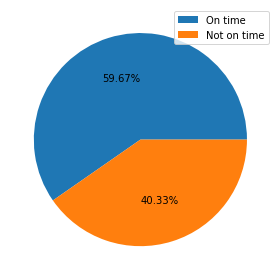

In [7]:
#import libraries to do EDA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#holds only the column on_time
count_df = df['on_time']
#holds the values of the counting for the pie graph
pie_values = []

#Append the counting values 
pie_values.append(count_df[df['on_time'] == 1].count())
pie_values.append(count_df[df['on_time'] == 0].count())

#Print with two decimals
plt.pie(pie_values,autopct="%.2f%%")
plt.legend(['On time','Not on time'])
plt.tight_layout()
plt.show()

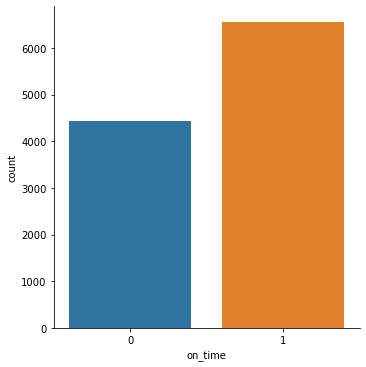

In [8]:
sns.catplot('on_time',data=df,kind='count')

**Categorical plots for qualitative variables (categorical)** 

Counting 

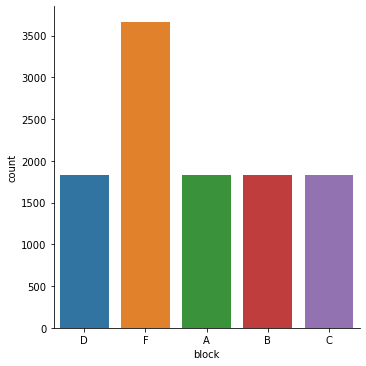

In [9]:
sns.catplot('block', data=df,  kind='count')

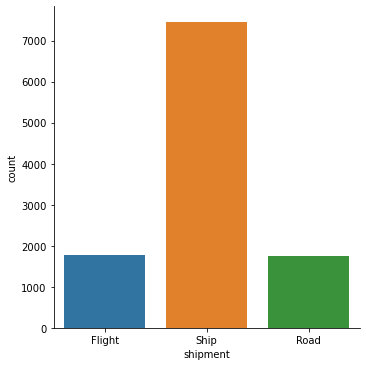

In [10]:
sns.catplot('shipment',data=df,kind='count')

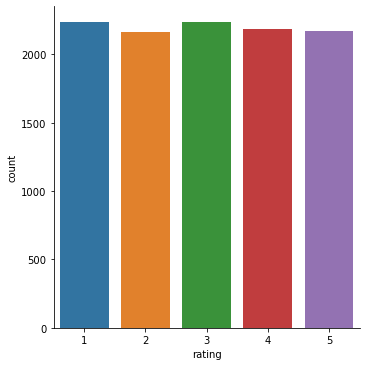

In [11]:
sns.catplot('rating',data=df,kind='count')

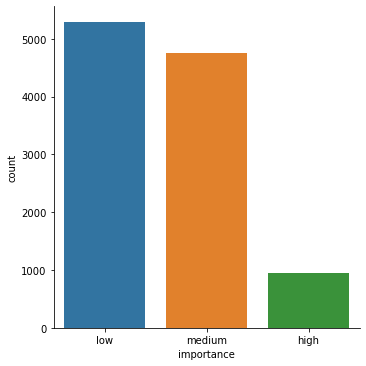

In [12]:
sns.catplot('importance',data=df,kind='count')

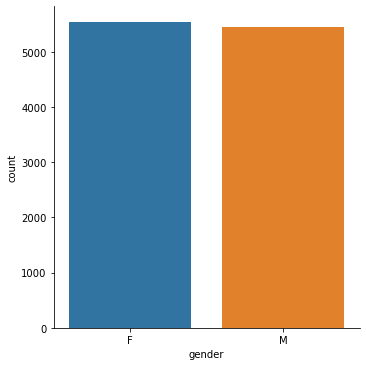

In [13]:
sns.catplot('gender',data=df,kind='count')

Now let's see how of these variables are related to **on_time**

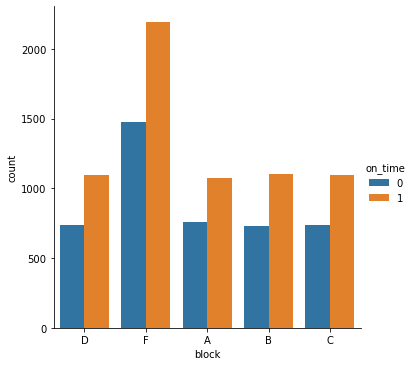

In [14]:
sns.catplot('block',data=df,hue='on_time',kind='count')

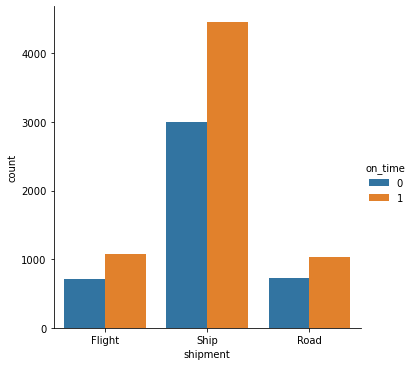

In [15]:
sns.catplot('shipment',data=df,hue='on_time',kind='count')

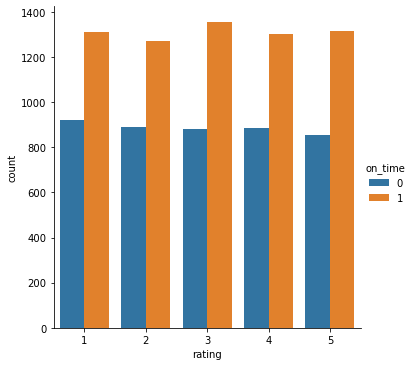

In [16]:
sns.catplot('rating',data=df,hue='on_time',kind='count')

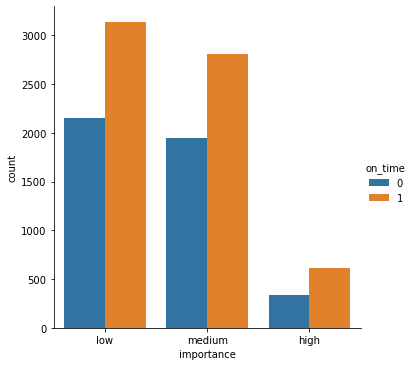

In [17]:
sns.catplot('importance',data=df,hue='on_time',kind='count')

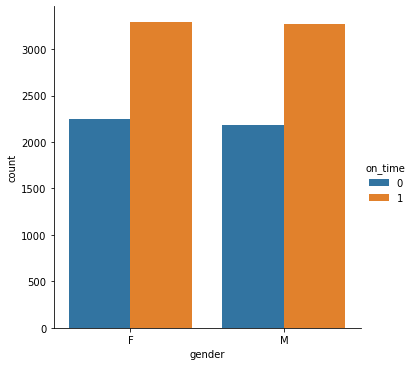

In [18]:
sns.catplot('gender',data=df,hue='on_time',kind='count')

**Histograms of quantitative variables**

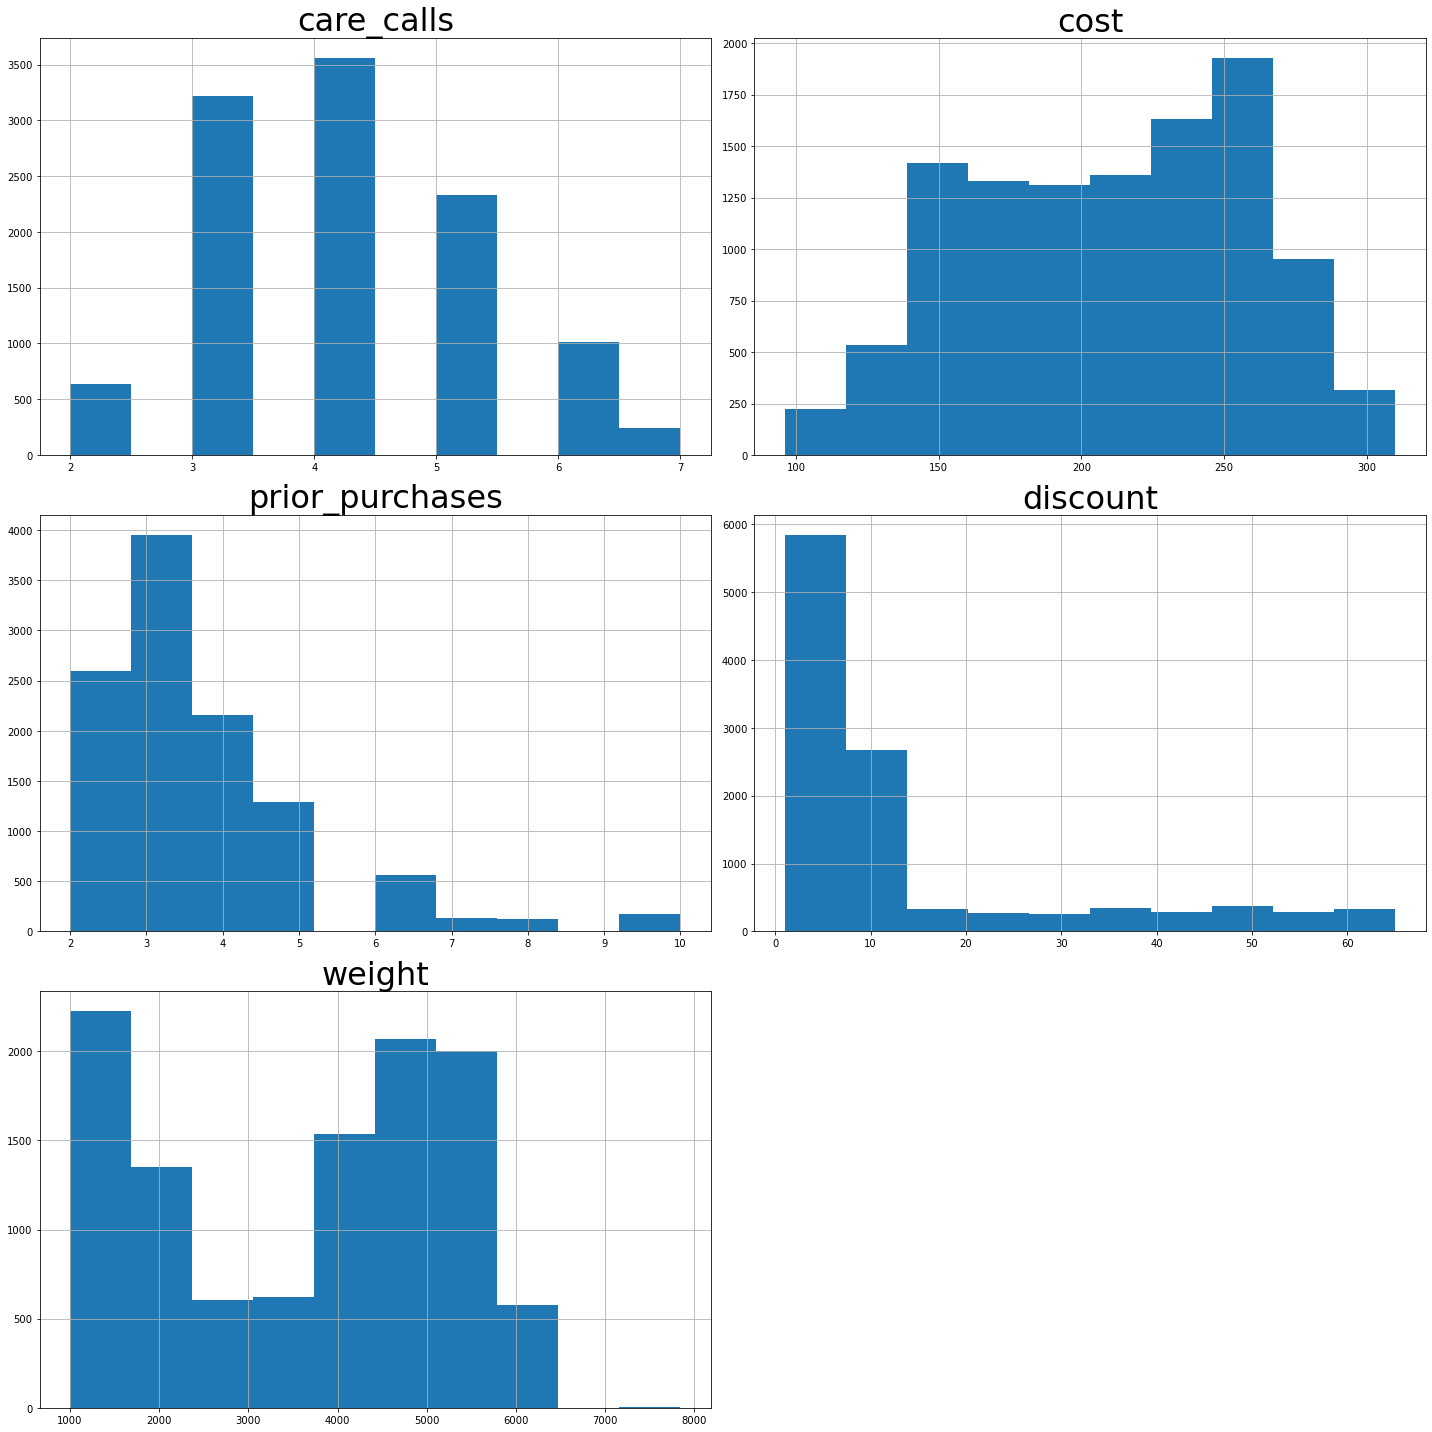

In [19]:

#Create a new DataFrame with only quantitaitve data to plot the histograms
#Qualitative plots are below
df_quantitative = df.drop(['block','shipment','rating','importance','gender','on_time'],axis=1).copy()

fig = df_quantitative.hist(figsize=(20,20))
[x.title.set_size(32) for x in fig.ravel()]

plt.tight_layout()
plt.show()

In [20]:
df['cost'].mean()

210.19683607600692

**Density plots for quantitative variables**

No handles with labels found to put in legend.


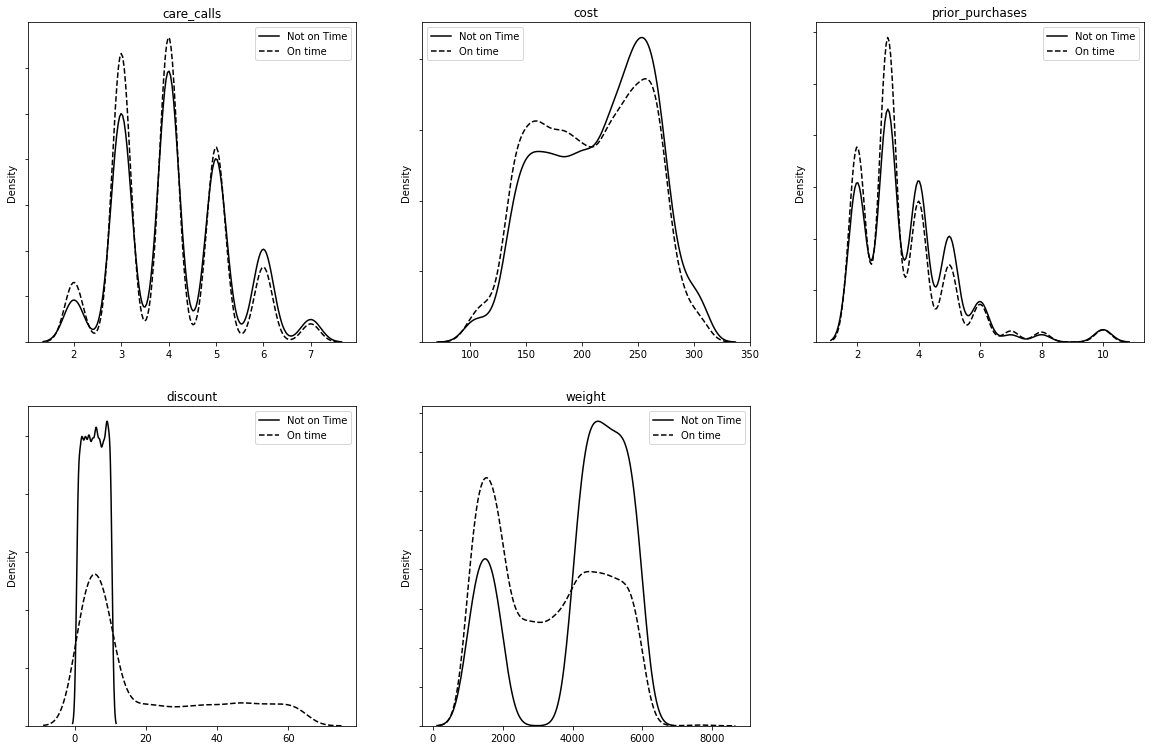

In [21]:
df_density = df.drop(['block','shipment','importance','gender','rating'],axis=1).copy()
# show density plot
# create a subplot of 2 x 3
plt.subplots(2,3,figsize=(20,20))

# Plot a density plot for each variable
for idx, col in enumerate(df_density.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df_density.on_time == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':'Not on Time'})
    sns.distplot(df.loc[df_density.on_time == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':'On time'})
    ax.set_title(col)
    ax.legend()
    
# Hide the 7th, 8th and 9th subplot (bottom right) since there are only 6 plots
# This is done because apparently it does not allow a 2x3 matrix to plot only 6
plt.subplot(2,3,6).set_visible(False)
plt.tight_layout()
plt.show()

# Discount and weight graphs show that they are predictors of whether a product is on time or not, so let's plot some whisker boxes

<AxesSubplot:xlabel='on_time', ylabel='weight'>

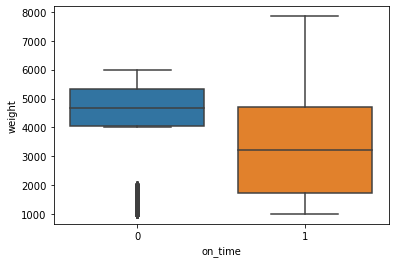

In [22]:
sns.boxplot(x='on_time',y='weight',data=df)

<AxesSubplot:xlabel='on_time', ylabel='weight'>

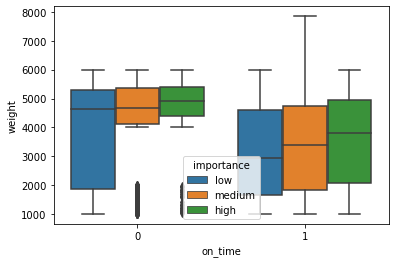

In [23]:
sns.boxplot(x='on_time',y='weight',hue='importance',data=df)

<AxesSubplot:xlabel='on_time', ylabel='discount'>

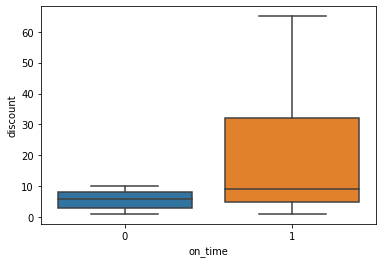

In [24]:
sns.boxplot(x='on_time',y='discount',data=df)

<AxesSubplot:xlabel='on_time', ylabel='discount'>

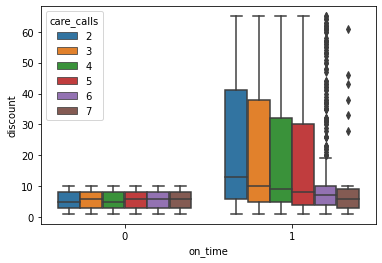

In [25]:
sns.boxplot(x='on_time',y='discount',hue='care_calls',data=df)

<AxesSubplot:xlabel='on_time', ylabel='discount'>

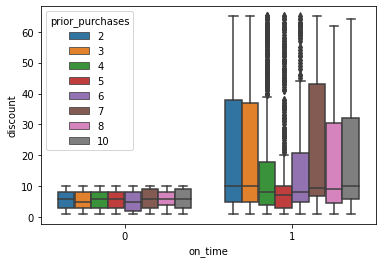

In [26]:
sns.boxplot(x='on_time',y='discount',hue='prior_purchases',data=df)

# Data Preprocessing and Data Modelling

In [27]:
#Check for missing values on the data
print(df.isnull().any())

block              False
shipment           False
care_calls         False
rating             False
cost               False
prior_purchases    False
importance         False
gender             False
discount           False
weight             False
on_time            False
dtype: bool


Looks like there is **no missing value**, are we sure?
Let's see how the dataset looks

In [28]:
df.describe()

,care_calls,rating,cost,prior_purchases,discount,weight,on_time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [29]:
#Now check type of variables to pass to the model as some of them may need to be casted or encoded
df.dtypes

block              object
shipment           object
care_calls          int64
rating              int64
cost                int64
prior_purchases     int64
importance         object
gender             object
discount            int64
weight              int64
on_time             int64
dtype: object

In [30]:
#Encode 'gender' as it only contains two categories
df['gender'].replace({'M':1,'F':0},inplace=True)

In [32]:
#Now encode the rest of the categorical variables with pandas get_dummies
df_encoded = pd.get_dummies(df,columns=['shipment',
                                      'importance',
                                      'block',
                                      'rating'])
df_encoded.head()

,care_calls,cost,prior_purchases,gender,discount,weight,on_time,shipment_Flight,shipment_Road,shipment_Ship,...,block_A,block_B,block_C,block_D,block_F,rating_1,rating_2,rating_3,rating_4,rating_5
0,4,177,3,0,44,1233,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,4,216,2,1,59,3088,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,183,4,1,48,3374,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,3,176,4,1,10,1177,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2,184,3,0,46,2484,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
#import library and create a new dataframe

from sklearn import preprocessing
X_scaled = preprocessing.scale(df_encoded.drop('on_time',axis=1).copy())

In [31]:
#X contains the features to train the model
X = df.drop('on_time',axis=1).copy()
X.head()

,block,shipment,care_calls,rating,cost,prior_purchases,importance,gender,discount,weight
0,D,Flight,4,2,177,3,low,0,44,1233
1,F,Flight,4,5,216,2,low,1,59,3088
2,A,Flight,2,2,183,4,low,1,48,3374
3,B,Flight,3,3,176,4,medium,1,10,1177
4,C,Flight,2,2,184,3,medium,0,46,2484


In [32]:
#One-hot encoding of categorical variables
X_encoded = pd.get_dummies(X,columns=['shipment',
                                      'importance',
                                      'block',
                                      'rating'])
X_encoded.head()

,care_calls,cost,prior_purchases,gender,discount,weight,shipment_Flight,shipment_Road,shipment_Ship,importance_high,...,block_A,block_B,block_C,block_D,block_F,rating_1,rating_2,rating_3,rating_4,rating_5
0,4,177,3,0,44,1233,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,4,216,2,1,59,3088,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,183,4,1,48,3374,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,3,176,4,1,10,1177,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2,184,3,0,46,2484,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [46]:
#variable we want to predict
y = df['on_time'].copy()
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: on_time, dtype: int64

# DATA STANDARDISATION AND SPLIT
Standardization of variables as a preprocessing step is a requirement for many machine learning algorithms. Another positive effect of data standardization is that it shrinks the magnitude of the variables, transforming them to a scale that is more proportional.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y ,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [39]:
#Create the model and train it
from sklearn.svm import SVC
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

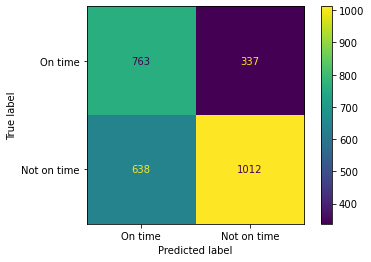

In [40]:
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['On time','Not on time'])

In [ ]:
#Library for cross-validation
from sklearn.model_selection import GridSearchCV

In [45]:
#Search for the best parameters for the model
param_grid = [
    {'C':[1,5,10,15,20,25,30], #The values for C must be >0
     'gamma':[1,0.1,0.05,0.01,0.005,0.0025,0.001],
     'kernel':['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=7,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [47]:
#create a new model with the parameters obtained from the search
clf_svm = SVC(random_state=42,C=1,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.001, random_state=42)

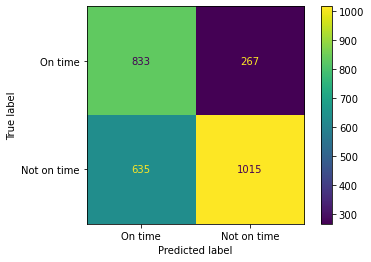

In [48]:
#plot new confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['On time','Not on time'])